In [16]:
import numpy as np
from lists import *
board = np.zeros((10,5),dtype=int)

class Piece:


	def __init__(self,type, starting_position, board_size) -> None:
		self.x = starting_position[0]
		self.y = starting_position[1]
		self.type = type
		self.color = color_pieces[type]
		self.rotation = 90
		self.shape = codes_pieces[type][self.rotation]
		self.board_size = board_size

		self.empty: bool = False

		self.max_x=max(self.shape[:,0])
		self.min_x=min(self.shape[:,0])
		self.max_y=max(self.shape[:,1])
		self.min_y=min(self.shape[:,1])

		self.grounded = False


		# print(f"{types_pieces[self.type]} created at {self.x},{self.y}")

	def x_up_bound(self):
		return max(self.shape[:,0])+self.x
	def x_down_bound(self):
		return min(self.shape[:,0])+self.x
	def y_up_bound(self):
		return max(self.shape[:,1])+self.y
	def y_down_bound(self):
		return min(self.shape[:,1])+self.y

	def __str__(self) -> str:
		return str(types_pieces[self.type])+'at'+str(self.x)+','+str(self.y)
	
	def board_position(self, original_shape=False):
		squares=np.copy(self.shape)
		squares[:,0]+=self.x
		squares[:,1]+=self.y

		indices=tuple(squares.T)
		if original_shape:
			return squares
		
		return indices
	
	def assing_shape(self, shape):
		shape[:,0] -= self.x
		shape[:,1] -= self.y
		  

	
	def rotate(self):
		self.rotation = (self.rotation+ 90) % 360
		self.shape = codes_pieces[self.type][self.rotation]
		self.max_x=max(self.shape[:,0])
		self.min_x=min(self.shape[:,0])
		self.max_y=max(self.shape[:,1])
		self.min_y=min(self.shape[:,1])

		if (self.y_down_bound()<0 ):
			self.y = -self.min_y

		if (self.y_up_bound()>self.board_size[1]-1):
			self.y = self.board_size[1]-1-self.max_y

		if (self.x_down_bound()<0 ):
			self.x = -self.min_x

		if (self.x_up_bound()>self.board_size[0]-1):
			self.x = self.board_size[0]-1-self.max_x


# - ROTATION TESTS
# print('----0')
# piece1=piece(7,[7,2])
# board[piece1.board_position()]=piece1.type
# print(np.flipud(board.T))
# print('----90')
# board=board*0
# piece1.rotate()

# board[piece1.board_position()]=piece1.type
# print(np.flipud(board.T))
# print('----180')
# board=board*0
# piece1.rotate()

# board[piece1.board_position()]=piece1.type
# print(np.flipud(board.T))
# print('----270')
# board=board*0
# piece1.rotate()
# board[piece1.board_position()]=piece1.type
# print(np.flipud(board.T))
# print('----0')
# board=board*0
# piece1.rotate()
# board[piece1.board_position()]=piece1.type
# print(np.flipud(board.T))

 

In [45]:
piece1=Piece(1,[7,2],board.shape)
piece_y = piece1.board_position(True)[:,1]
lines_with_no_zeros =np.array([4])

remaining_blocks = np.where(~np.isin(piece_y, lines_with_no_zeros))
piece1.shape = piece1.shape[remaining_blocks]
piece_y = piece1.board_position(True)[:,1]
for i in range(len(piece_y)):
	height = piece_y[i]
	print(height>lines_with_no_zeros)
	piece1.shape[i,1] = piece1.shape[i,1] - np.sum(height>lines_with_no_zeros)

print(piece1.board_position(True))


1
[False]
[False]
[False]
[False]
[[7 0]
 [7 1]
 [7 2]
 [7 3]]


In [59]:
piece1=Piece(1,[7,6],board.shape)
print(piece1.board_position(True))
piece_y = piece1.board_position(True)[:,1]
lines_with_no_zeros =np.array([6])

remaining_blocks = np.where(~np.isin(piece_y, lines_with_no_zeros))
piece1.shape = piece1.shape[remaining_blocks]
piece_y = piece1.board_position(True)[:,1]

heights = piece_y
shifts = np.sum(heights[:, None] > lines_with_no_zeros, axis=1)
piece1.shape[:,1] -= shifts

print(piece1.board_position(True))

[[7 4]
 [7 5]
 [7 6]
 [7 7]]
[[7 4]
 [7 5]
 [7 6]]


In [6]:
board2=np.zeros((5,10),dtype=int)
board2[:,0]=1
board2[:,1]=1
print(np.flipud(board2.T))
print(np.where(np.all(board2 != 0, axis=0))[0])

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[0 1]


In [7]:
ground=np.zeros((5,10),dtype=int)
ground[:,3]=1
ground[:,0]=1
lines_cleared=np.array([1,2])
ground[:,lines_cleared]=ground[:,lines_cleared]*0
print(np.flipud(ground.T))

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 1]]


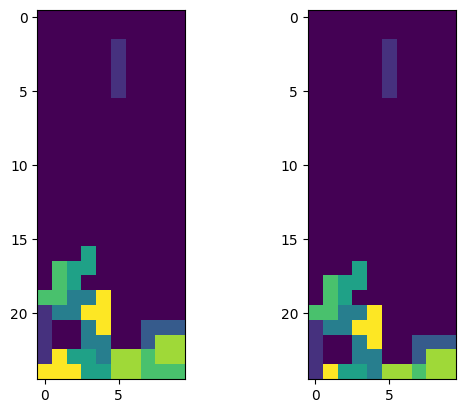

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
frame=698
ax[0].imshow(np.loadtxt(f'game_states/{frame}_before.csv',delimiter=','))
ax[1].imshow(np.loadtxt(f'game_states/{frame}_later.csv',delimiter=','))


In [ ]:
np.array([[0 0],[1 0],[1 1],[2 0]])